In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
import sys
import os

import matplotlib.pyplot as plt
sys.path.append('../')
import utils.helper_signals as helper_signals
import utils.helper_mf4 as helper_mf4

In [5]:
vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]

dfMf4Dic = helper_signals.load_csv_to_dic(path="../Processed_data_new/02_MF4_Filled", v_names=vehicle_names, ext="_filled_mf4.csv")
dfMergedDic = helper_signals.load_csv_to_dic(path="../Processed_data_new/04_Merged", v_names=vehicle_names, ext="_merged.csv")

dfMf4 = pd.DataFrame()
dfMerged = pd.DataFrame()
for vehicle in vehicle_names:
    dfMf4 = pd.concat([dfMf4, dfMf4Dic[vehicle]])
    dfMerged = pd.concat([dfMerged, dfMergedDic[vehicle]])

/Users/wannerje/Documents/Digital-Assist-AI/In-Car-RecSys/notebooks/../utils/helper_signals.py:22: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/Users/wannerje/Documents/Digital-Assist-AI/In-Car-RecSys/notebooks/../utils/helper_signals.py:22: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/Users/wannerje/Documents/Digital-Assist-AI/In-Car-RecSys/notebooks/../utils/helper_signals.py:22: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/Users/wannerje/Documents/Digital-Assist-AI/In-Car-RecSys/notebooks/../utils/helper_signals.py:22: DtypeWarning: Columns (16,28,29,30,31) have

In [6]:
dfMf4.keys()

Index(['avg_irradiation', 'steering_speed', 'temperature_out', 'hour', 'month',
       'odometer', 'light_sensor_rear', 'light_sensor_front', 'temperature_in',
       'KBI_speed', 'soc', 'ESP_speed', 'latitude', 'longitude',
       'seatbelt_codriver', 'seatbelt_rear_l', 'seatbelt_rear_m',
       'seatbelt_rear_r', 'CHA_ESP_drive_mode', 'CHA_MO_drive_mode',
       'rain_sensor', 'street_category', 'kickdown', 'altitude',
       'driving_program', 'datetime', 'session'],
      dtype='object')

# Distribution and Range of variables in 

In [41]:
def histo_context(var, bins=10, unit="cat", logs=True):

    data1 = dfMf4[var]
    data2 = dfMerged[var]

    print(f"Signal detection success (mf4 complete): {100* round(data1.notna().sum()/len(data1),2)}%")
    print(f"Signal detection success (mf4 with interaction): {100* round(data2.notna().sum()/len(data2),2)}%")

    x_min = round(min(data1.min(), data2.min()), 2)
    x_max = round(max(data1.max(), data2.max()), 2)

    # magenta: #fb607f
    # green neon: #83f090
    # yellow neon: #ddeb52
    # blue super light: #b9e6ff

    plt.hist(data1, bins=bins, facecolor='#b9e6ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7, label="MF4 complete")
    plt.hist(data2, bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7, label="MF4 with interaction")

    # # Create the histogram with limited x-axis range for the first dataframe
    # plt.hist(data1, bins=10, range=(x_min, x_max), alpha=0.5, label='Data 1')

    # # Create the histogram with limited x-axis range for the second dataframe
    # plt.hist(data2, bins=10, range=(x_min, x_max), alpha=0.5, label='Data 2')
    
    if logs == True:
        plt.yscale('log')
        plt.text(x_min, plt.ylim()[1]*0.8 , f'Lowest Value: {x_min}', va='top', ha='left', fontsize=14)
        plt.text(x_max, plt.ylim()[1]*0.8, f'Highest Value: {x_max}', va='top', ha='right', fontsize=14)
    else:
        plt.text(x_min, plt.ylim()[1]*0.99 , f'Lowest Value: {x_min}', va='top', ha='left', fontsize=14)
        plt.text(x_max, plt.ylim()[1]*0.99, f'Highest Value: {x_max}', va='top', ha='right', fontsize=14)

    # Add labels and title
    plt.xlabel(f'{var} [{unit}]', fontsize=14)
    if logs:
        plt.ylabel('Frequency (log scale)', fontsize=14)
    else:
        plt.ylabel('Frequency', fontsize=14)
    plt.title(f'{var} Distribution', fontsize=18)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=14)

    # save as pdf 
    #plt.savefig(f'../images/histogram_{var}.pdf', bbox_inches='tight')

    # Display the histogram
    plt.show()


Signal detection success (mf4 complete): 100.0%
Signal detection success (mf4 with interaction): 100.0%


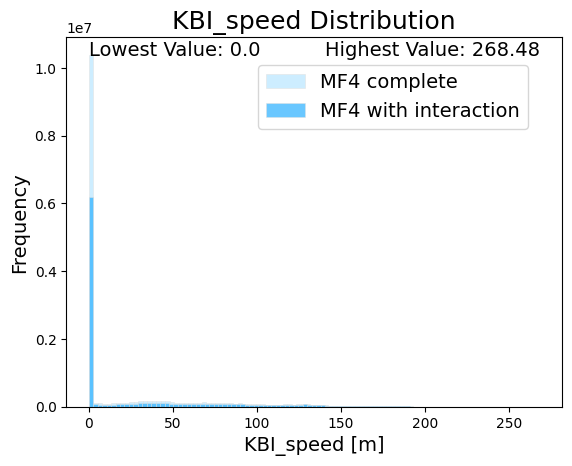

In [56]:
histo_context("KBI_speed", bins= 100, unit="m", logs=False)

Signal detection success (mf4 complete): 100.0%
Signal detection success (mf4 with interaction): 100.0%


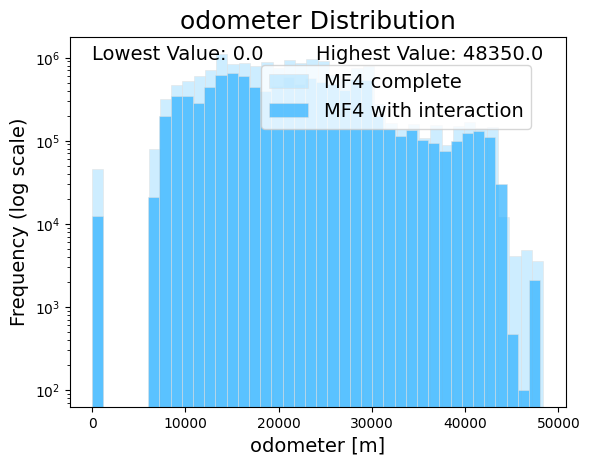

In [12]:
histo_context("odometer", bins= 40, unit="m")

Signal detection success (mf4 complete): 83.0%
Signal detection success (mf4 with interaction): 97.0%


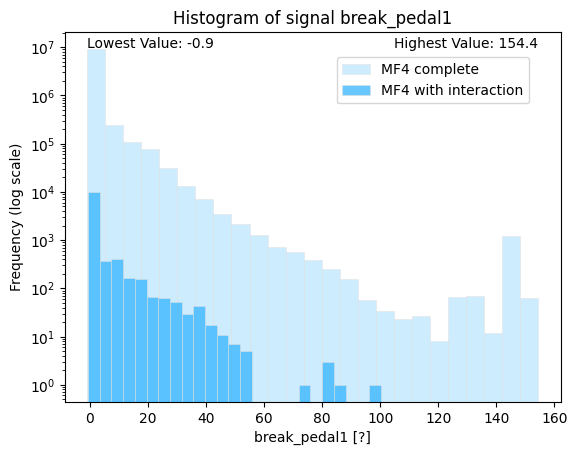

In [99]:
histo_context("break_pedal1", bins=25, unit="?")

Signal detection success (mf4 complete): 100.0%
Signal detection success (mf4 with interaction): 100.0%


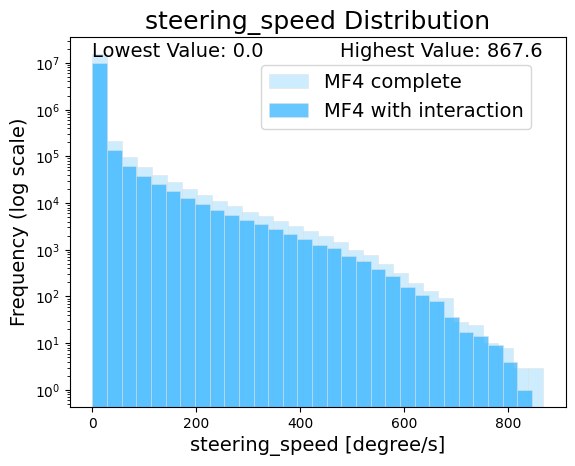

In [17]:
histo_context("steering_speed", bins=30, unit="degree/s")

Signal detection success (mf4 complete): 91.0%
Signal detection success (mf4 with interaction): 94.0%


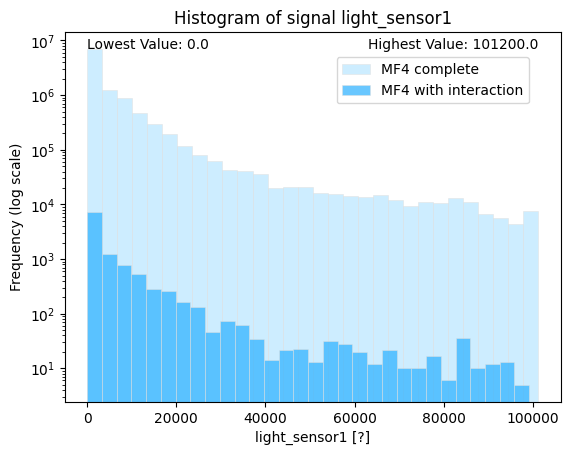

In [100]:
histo_context("light_sensor1", bins=30, unit="?")

Signal detection success (mf4 complete): 91.0%
Signal detection success (mf4 with interaction): 94.0%


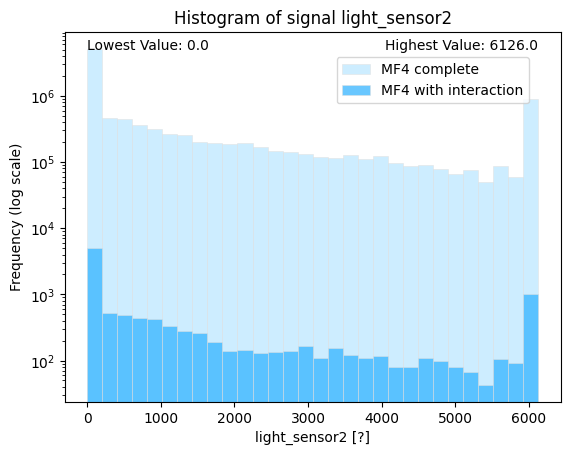

In [101]:
histo_context("light_sensor2", bins=30, unit="?")

Signal detection success (mf4 complete): 22.0%
Signal detection success (mf4 with interaction): 30.0%


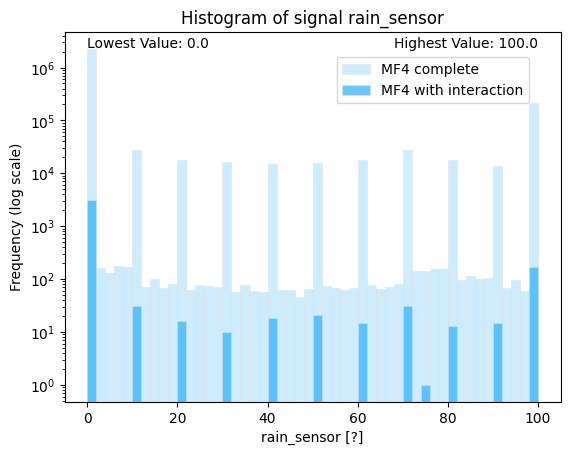

In [102]:
histo_context("rain_sensor", bins=50, unit="?")

Signal detection success (mf4 complete): 83.0%
Signal detection success (mf4 with interaction): 97.0%


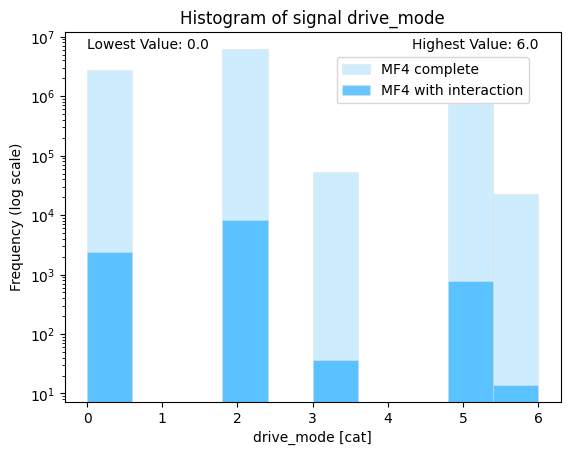

In [103]:
histo_context("drive_mode", bins=10, unit="cat")

Signal detection success (mf4 complete): 83.0%
Signal detection success (mf4 with interaction): 97.0%


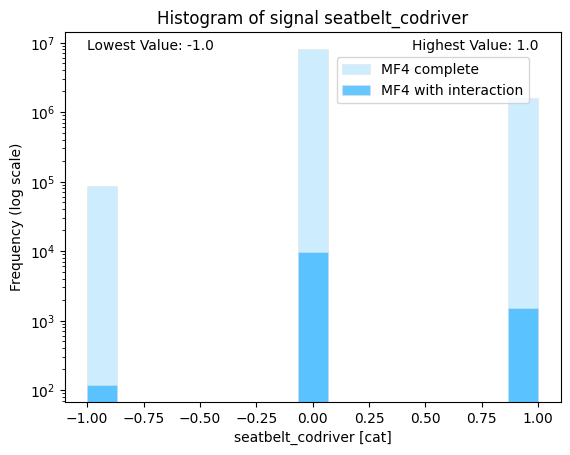

In [104]:
histo_context("seatbelt_codriver", bins=15, unit="cat")

Signal detection success (mf4 complete): 95.0%
Signal detection success (mf4 with interaction): 99.0%


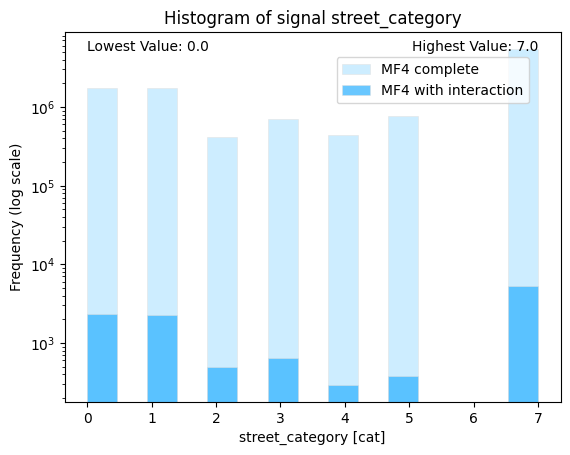

In [105]:
histo_context("street_category", bins=15, unit="cat")

Signal detection success (mf4 complete): 74.0%
Signal detection success (mf4 with interaction): 81.0%


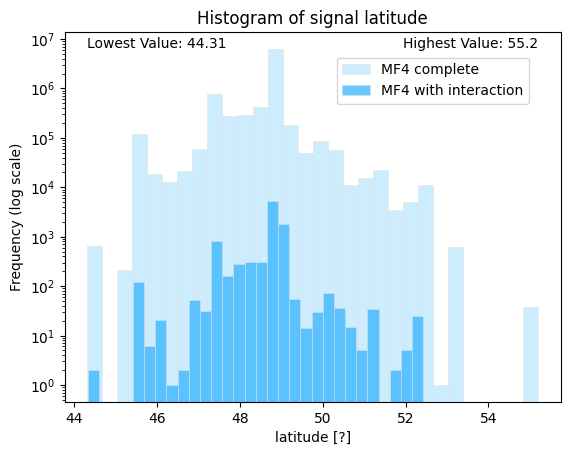

In [106]:
histo_context("latitude", bins=30, unit="?")

Signal detection success (mf4 complete): 74.0%
Signal detection success (mf4 with interaction): 81.0%


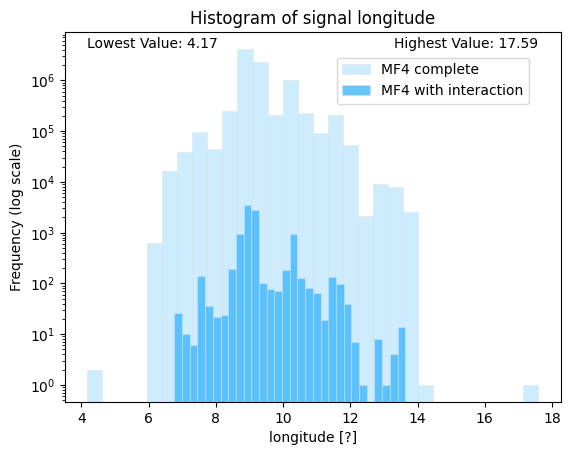

In [107]:
histo_context("longitude", bins=30, unit="?")

Signal detection success (mf4 complete): 10.0%
Signal detection success (mf4 with interaction): 14.000000000000002%


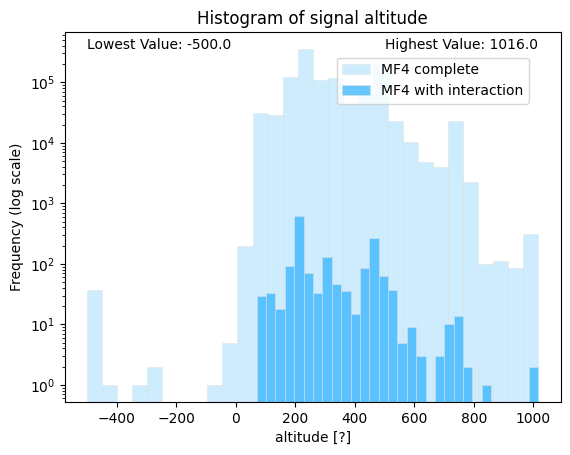

In [108]:
histo_context("altitude", bins=30, unit="?")

Signal detection success (mf4 complete): 86.0%
Signal detection success (mf4 with interaction): 92.0%


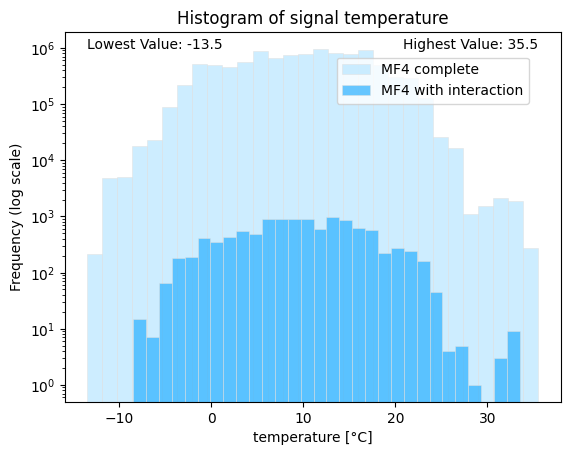

In [109]:
histo_context("temperature", bins=30, unit="°C")

Signal detection success (mf4 complete): 96.0%
Signal detection success (mf4 with interaction): 95.0%


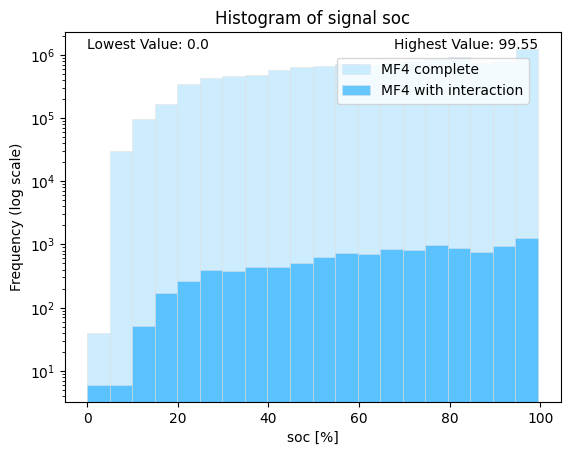

In [110]:
histo_context("soc", bins=20, unit="%")

Signal detection success (mf4 complete): 13.0%
Signal detection success (mf4 with interaction): 15.0%


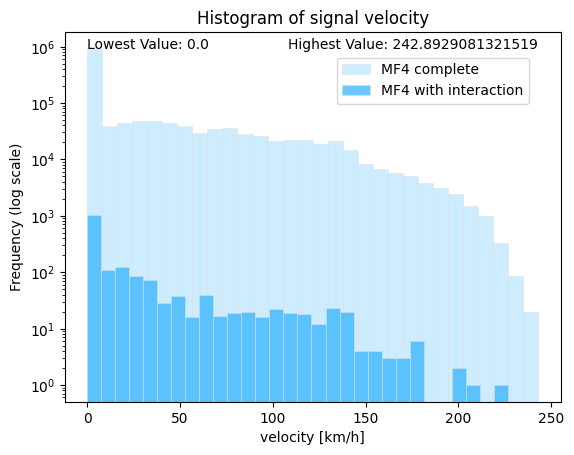

In [77]:
histo_context("velocity", bins=30, unit="km/h")

In [82]:
s_i = dfMf4.sun_intensity.apply(helper_mf4.convert_byte_to_float)
# print(s_i.value_counts())

for value in s_i:
    if type(value) == str:
        print(type(value), value)

# histo_context("sun_intensity", bins=30, unit="%")

In [121]:
def histo_context_2(var, bins=10, unit="cat"):

    data2 = dfMerged[var]

    #print(f"Signal detection success (mf4 complete): {100* round(data1.notna().sum()/len(data1),2)}%")
    print(f"Signal detection success (mf4 with interaction): {100* round(data2.notna().sum()/len(data2),2)}%")

    x_min = round(min(data2.min(), data2.min()), 2)
    x_max = round(max(data2.max(), data2.max()), 2)

    # magenta: #fb607f
    # green neon: #83f090
    # yellow neon: #ddeb52
    # blue super light: #b9e6ff

    plt.hist(data2, bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7, label="MF4 with interaction")

    # # Create the histogram with limited x-axis range for the first dataframe
    # plt.hist(data1, bins=10, range=(x_min, x_max), alpha=0.5, label='Data 1')

    # # Create the histogram with limited x-axis range for the second dataframe
    # plt.hist(data2, bins=10, range=(x_min, x_max), alpha=0.5, label='Data 2')
    
    #plt.yscale('log')

    plt.text(x_min, plt.ylim()[1]*0.8 , f'Lowest Value: {x_min}', va='top', ha='left')
    plt.text(x_max, plt.ylim()[1]*0.8, f'Highest Value: {x_max}', va='top', ha='right')

    # Add labels and title
    plt.xlabel(f'{var} [{unit}]')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of signal {var}')

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

    # save as pdf 
    plt.savefig(f'../images/histogram_{var}.pdf', bbox_inches='tight')

    # Display the histogram
    plt.show()


Signal detection success (mf4 with interaction): 100.0%


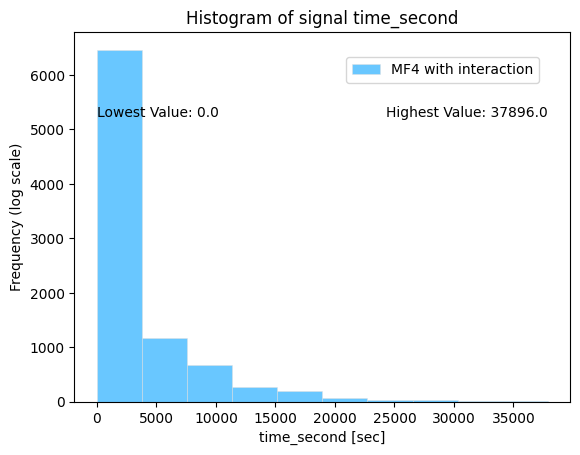

9.722222222222221


In [125]:
histo_context_2("time_second", bins=10, unit="sec")

# begin drive session : 00:00
# fist inter. : 01:00
# second 
print(35000/3600.)